In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
import tokenize
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
# Importing disaster messages data
df = pd.read_csv('../datasets/df_clean.csv')
df = df[['message', 'fire']]

In [3]:
df[df['fire'] == 1].head(3)

,message,fire
89,we have a factory that is on fire on road to t...,1
103,theres a fire at the perpetuel secours church ...,1
142,good morning to everyone that is listening in ...,1


In [4]:
pd.set_option(
    'display.max_colwidth', 900
)
df.iloc[103,:]

message    theres a fire at the perpetuel secours church please send firefighters
fire                                                                            1
Name: 103, dtype: object

### Instantiate and create new columns for tokenized words

In [5]:
# Instantiate tokenizer.
tokenizer = RegexpTokenizer('\s+', gaps=True)

# Instantiate lemmatizer. 
lemmatizer = WordNetLemmatizer()

In [6]:
df['text'] = df.message.apply(lambda t: ' '.join(
    [word for word in t.split(' ') if word not in stopwords.words('english')]))
df['text'] = df['text'].apply(lambda t: ' '.join([lemmatizer.lemmatize(word) 
        for word in t.split(' ')]))

In [7]:
df.text

0                                                                                                                                                                              weather update  cold front cuba could pas haiti
1                                                                                                                                                                                                                    hurricane
2                                                                                                                                                                               say west side haiti rest country today tonight
3                                                                                                                                                                                                  information national palace
4                                                                                                           

### Exploring most common-words

Exploring word count and length of words, before words were tokenized, lemmatized, removed stop words

In [8]:
df['length'] = df['text'].apply(len)
df['word_count']= df['text'].apply(lambda x: len(x.split()))

In [9]:
df[['length', 'word_count']].describe()

,length,word_count
count,23609.000000,23609.000000
mean,101.758524,14.101021
std,145.834670,19.327575
min,3.000000,0.000000
25%,49.000000,7.000000
50%,85.000000,12.000000
75%,127.000000,18.000000
max,7938.000000,1072.000000


In [10]:
df[df.length > 500].index

Int64Index([ 9995,  9998, 10127, 10502, 10525, 10962, 11192, 11351, 11769,
            11789, 11802, 11811, 11814, 11817, 12053, 12167, 12261, 12380,
            12565, 12576, 12687, 12692, 12731, 12810, 12849, 12887, 12889,
            12895, 12932, 12966, 12972, 13688, 13743, 13763, 13842, 13882,
            14182, 14309, 14357, 14412, 15219, 15535, 15546, 16397, 16548,
            16556, 16630, 16695, 16820, 16878, 16895, 17048, 17065, 17137,
            17229, 17621, 17651, 17786, 17981, 18053, 18101, 18123, 18193,
            18254, 18330, 18459, 18528, 19234, 19470, 19864, 19954, 19959,
            20037, 20312, 22325, 22486, 22583, 22796, 22934, 22992, 23046,
            23124, 23151, 23284, 23451],
           dtype='int64')

In [11]:
# dropping 85 rows with 
len(df[df.length > 500].index)

85

In [12]:
df_short = df.drop(df[df.length > 500].index)

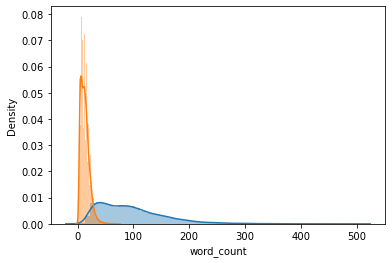

In [18]:
sns.distplot(df_short.length, norm_hist = True)
sns.distplot(df_short.word_count, norm_hist = True);
plt.savefig('../reports/word_count_length.png')

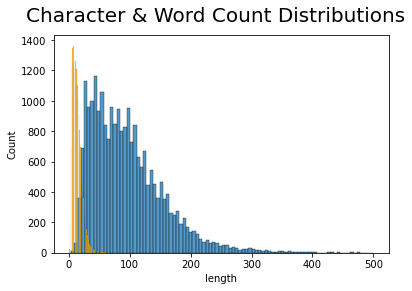

In [19]:
sns.histplot(df_short['length'])
sns.histplot(df_short['word_count'], color= 'orange')
plt.suptitle('Character & Word Count Distributions', fontsize=20);
plt.savefig('../reports/word_count_length_distributions.png')

In [22]:
df = pd.read_csv('../datasets/df_clean.csv')
df = df[['message', 'floods']]

In [24]:
X = df['message']
y = df['floods']

In [27]:
cv = CountVectorizer(stop_words= 'english')
df_vect = cv.fit_transform(df['message'])
df_vect_df = pd.DataFrame(df_vect.todense(), columns = cv.get_feature_names())

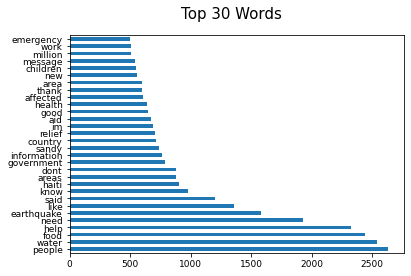

In [29]:
df_vect_df.sum().sort_values(ascending=False).head(30).plot(kind='barh', fontsize=9)
plt.suptitle('Top 30 Words', fontsize=15);
plt.savefig('../reports/top_30_words')

### Looking at Top 20 Coupled Words

In [32]:
cv2 = CountVectorizer(stop_words= 'english', ngram_range = (2, 2))
df_bigram_vect = cv2.fit_transform(df['message'])
df_bigram = pd.DataFrame(df_bigram_vect.todense(), columns = cv2.get_feature_names())

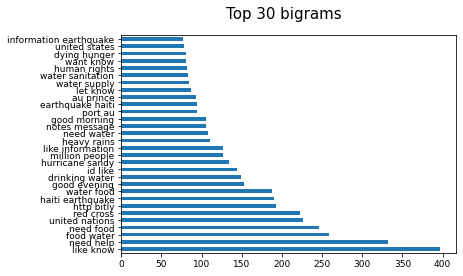

In [33]:
df_bigram.sum().sort_values(ascending=False).head(30).plot(kind='barh', fontsize=9)
plt.suptitle('Top 30 bigrams', fontsize=15);
plt.savefig('../reports/top_30_bigrams')